In this lecture, we will study the basic functionality of the library 'seaborn', which is constructed based on 'matplotlib' and is primarily used in statistical plots. The 'seaborn' package's official documentation is listed here: http://seaborn.pydata.org/. This package can be used to generate many high level visualizations such as distribution plots, categorical plots, matrix plots, and regression plots etc. Flexible arrangements of graphic displays with different plot types can be grappled through the use of different types of grids. Customizations and styles such as colors and picture size are all available in this comprehensive package. 

In this lecture, we will focus on building distribution plots and categorical plots. 

We start our journey with distribution plots. As an overview, we will discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

In [1]:
import seaborn as sns
%matplotlib inline

The 'seaborn' package comes with a set of built-in datasets. For now, we will use the 'tips' dataset as an example:

In [2]:
tips = sns.load_dataset('tips')
print(tips.head(n=20))
print(type(tips))

    total_bill   tip     sex smoker  day    time  size
0        16.99  1.01  Female     No  Sun  Dinner     2
1        10.34  1.66    Male     No  Sun  Dinner     3
2        21.01  3.50    Male     No  Sun  Dinner     3
3        23.68  3.31    Male     No  Sun  Dinner     2
4        24.59  3.61  Female     No  Sun  Dinner     4
5        25.29  4.71    Male     No  Sun  Dinner     4
6         8.77  2.00    Male     No  Sun  Dinner     2
7        26.88  3.12    Male     No  Sun  Dinner     4
8        15.04  1.96    Male     No  Sun  Dinner     2
9        14.78  3.23    Male     No  Sun  Dinner     2
10       10.27  1.71    Male     No  Sun  Dinner     2
11       35.26  5.00  Female     No  Sun  Dinner     4
12       15.42  1.57    Male     No  Sun  Dinner     2
13       18.43  3.00    Male     No  Sun  Dinner     4
14       14.83  3.02  Female     No  Sun  Dinner     2
15       21.58  3.92    Male     No  Sun  Dinner     2
16       10.33  1.67  Female     No  Sun  Dinner     3
17       1

Our first example is the distplot(). The distplot() function shows the distribution of a univariate set of observations. The default plot for this is a distribution plot of a univariate variable (histogram) with its kernel density estimation. If you would like to suppress the KDE plot, then you can set an optional argument by kde=False. You can also control the bin-width by the 'bins' option: 

C:\Users\pgao\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


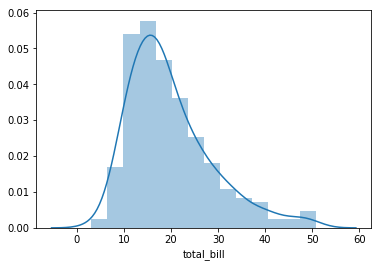

In [3]:
sns.distplot(tips['total_bill'])

C:\Users\pgao\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


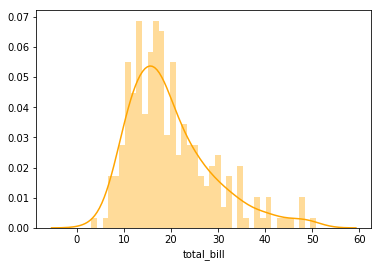

In [4]:
sns.distplot(tips['total_bill'], bins=40, color='orange')

Next, we study the method jointplot(), which allows you to basically match up two distplots for bivariate data. With difference choices of what kind parameter to compare with (e.g. scatter, reg, resid, kde, or hex etc.), we can achieve different visual effect. If the argument 'kind' is set to be 'reg', we will have a regression line. If the argument is set to be 'kde', then we get a kernel density estimation of where the bivariate points match the most:

C:\Users\pgao\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


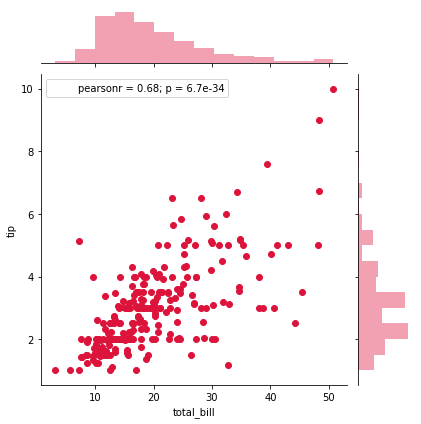

In [5]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter', color='crimson')

C:\Users\pgao\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


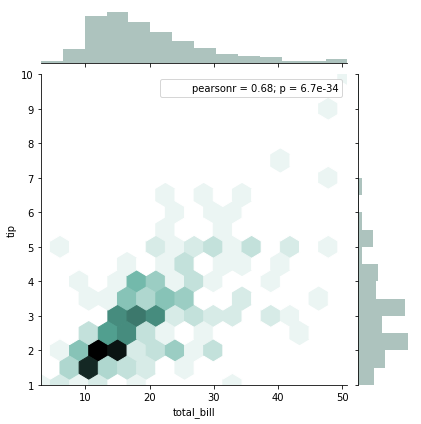

In [6]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex', color='#34695e') # hexagon plot

C:\Users\pgao\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


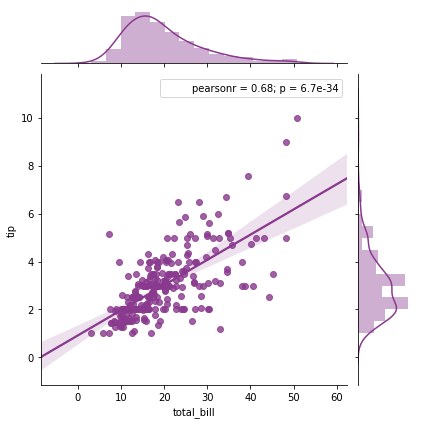

In [7]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg', color='#89398e') # linear regression plot

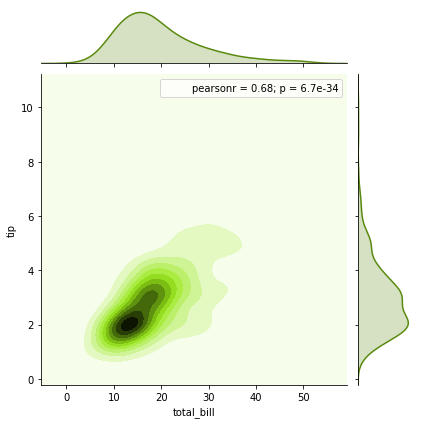

In [8]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde', color='#59890e') # density plot

Now moving on from the jointplot(), pairplot() will plot pairwise relationships across an entire data frame (for the numerical columns) and supports a color hue argument (for categorical columns). Essentially, this command will show us a pairwise plot of each numerical variable (combinatorially) and juxtapose them altogether in one graphical frame. When the variables are categorical vs. categorical (itself), the categorical variable will be plotted as a histogram. 

Remember the larger your 'DataFrame' object is, the more time it takes to plot all of the variables. So pairplot() is a very quick way to examine a dataset of small size. It's usually not a good idea to apply pairplot() to a gigantuan dataset.

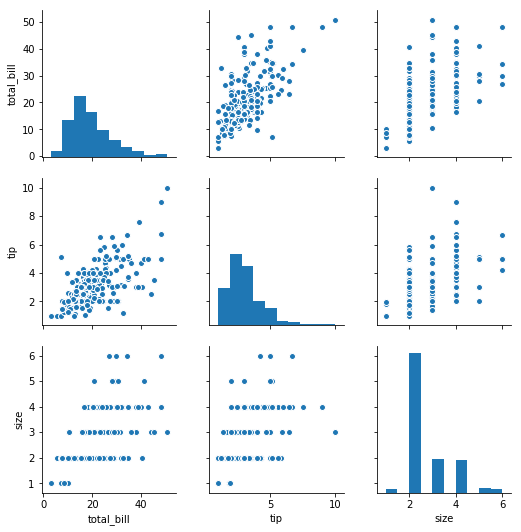

In [9]:
sns.pairplot(tips)

What's even nicer is that we can add the 'hue' argument, which will color the 'DataFrame' object based on the categorical variables. The additional 'palette' argument controls the colors.

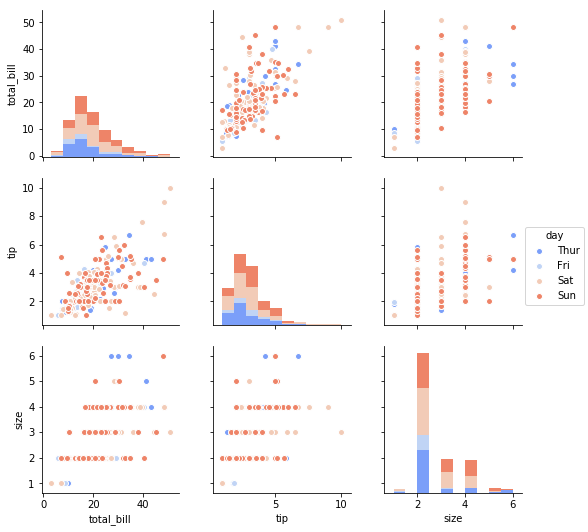

In [10]:
sns.pairplot(tips,hue='day',palette='coolwarm')

We now study rugplot(), which are actually a very simple concept, as they just draw a vertical pipe mark for every point on a univariate distribution. They are the building block of a KDE plot as dense areas indicate higher density:

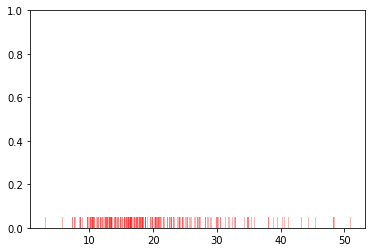

In [11]:
sns.rugplot(tips['total_bill'], color='red', alpha=0.3)

Next, we study kernel density plots (KDE plots). The kdeplot() replace every single observation with a (default) Gaussian distribution centered around that value. If you look at the documentation for the kdeplot(), we see that the 'kernel' argument is set to be normal, and the default gridsize=100. We know that KDE can vary drastically based on the kernels we choose and the bandwidth we pick, so kdeplot() should be used with a grain of salt. 

In [12]:
help(sns.kdeplot)

Help on function kdeplot in module seaborn.distributions:

kdeplot(data, data2=None, shade=False, vertical=False, kernel='gau', bw='scott', gridsize=100, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)
    Fit and plot a univariate or bivariate kernel density estimate.
    
    Parameters
    ----------
    data : 1d array-like
        Input data.
    data2: 1d array-like, optional
        Second input data. If present, a bivariate KDE will be estimated.
    shade : bool, optional
        If True, shade in the area under the KDE curve (or draw with filled
        contours when data is bivariate).
    vertical : bool, optional
        If True, density is on x-axis.
    kernel : {'gau' | 'cos' | 'biw' | 'epa' | 'tri' | 'triw' }, optional
        Code for shape of kernel to fit with. Bivariate KDE can only use
        gaussian kernel.
    bw : {'scott' | 'silverman' | scalar | pair of scalars }, optional
     

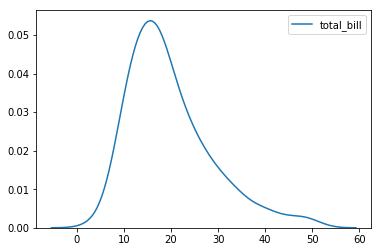

In [13]:
sns.kdeplot(tips['total_bill'])

We know essentially that kernel density estimators with symmetric kernel funtions are results of convolutions, so loosely speaking, we are basically adding up all the kernel functions at each point (see https://stats.stackexchange.com/questions/73623/kernel-density-estimation-is-a-convolution-of-what for reference). We can have a little bit of fun by constructing the KDE by hand. Below are the codes broken down into two parts. The first chunk creates a juxtaposed graphical display of rugplot and the normal curves. The second chunk of the codes 'adds up' (through convolution) the normal curves at each point and creates the kernel density plot:

(0, 1)

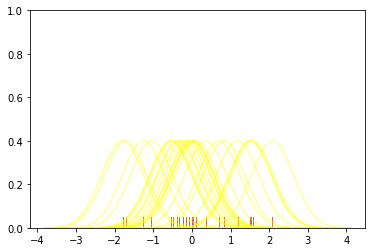

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

dataset = np.random.randn(25) # creating a dataset from a normal distribution 
sns.rugplot(dataset, color='indianred') # creating another rugplot

x_min = dataset.min() - 2 # setting up the x-axis for the plot
x_max = dataset.max() + 2 # setting up the x-axis for the plot
x_axis = np.linspace(x_min,x_max,100) # creating 100 equally spaced points from x_min to x_max

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**0.2 # setting the bandwidth

kernel_list = []

for data_point in dataset: # plotting each basis function   
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis) # creating a kernel for each point and append to the list
    kernel_list.append(kernel)   
    kernel = kernel / kernel.max() # scaling
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'yellow',alpha=0.4)
plt.ylim(0,1)

Text(0.5,0.98,'Sum of the Basis Functions')

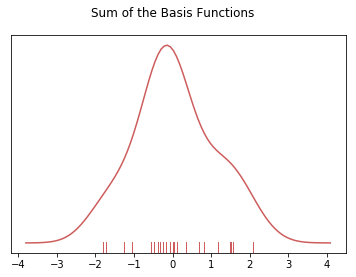

In [15]:
sum_of_kde = np.sum(kernel_list,axis=0) # summing the basis functions 

fig = plt.plot(x_axis,sum_of_kde,color='indianred')
sns.rugplot(dataset,c = 'indianred') # adding the initial rugplot
plt.yticks([]) # getting rid of the y-tick marks
plt.suptitle("Sum of the Basis Functions")

We have discussed plots of continuous distributions. The next part of our journey will be covering categorical plots. Let's still focus on the 'seaborn' package. There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

We will continue to use the 'tips' data for our subsequent examples. We start our discussion with barplots() and countplots().  Both plots allow us to get aggregate data off a categorical feature in the data. In 'seaborn', barplot() is a general plot that allows us to aggregate the categorical data based off some function, by default the mean. To change the default mean plot, we can change the 'estimator' argument to the function of our interest. 

C:\Users\pgao\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


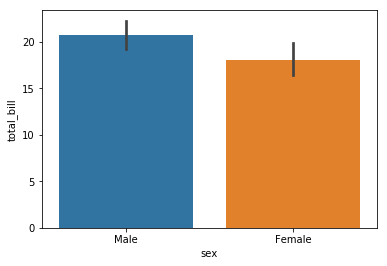

In [16]:
sns.barplot(x='sex',y='total_bill',data=tips) # average mean of the numeric variable per the categorical variable

Notice that from above, the x-argument must be categorical and the y-argument must be continuous for the barplot() function. Below is another example:

C:\Users\pgao\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


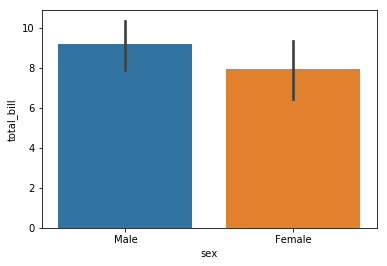

In [17]:
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std)

A countplot() function is closely associated with barplot() which we just described. The output of countplot() is essentially the same as that of barplot() except the estimator is explicitly counting the number of occurrences, which is why we only pass the x value. First, let's do a simple count of male and female:

C:\Users\pgao\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


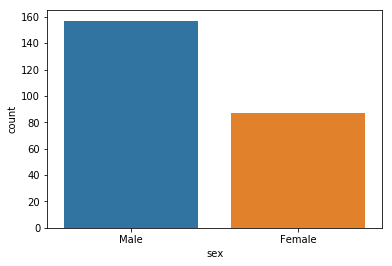

In [18]:
sns.countplot(x='sex',data=tips)

Notice that countplot() above is different from the barplot() below. The example above is basically a simple count of male and female numbers in the dataset, whereas the code below gives us the total amount of 'total_bill' for both male and female category:

C:\Users\pgao\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


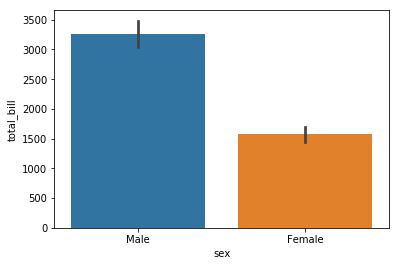

In [19]:
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.sum)

Now let's use this moment for a detour to talk about setting styles and tricks of customizations in 'seaborn'. This is very similar to setting an ODS template in SAS. One global way to set styles is to use the set_style() method. This method works like a global 'options' statement in SAS such that once the style is set, the same style will be carried over to subsequent pictures. This command basically affects things like the color of the axes, whether a grid is enabled by default, or other aesthetic elements. The official documentation will provide more explanations. 

Below is an example:

C:\Users\pgao\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


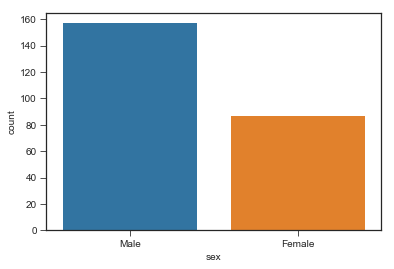

In [20]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips)

C:\Users\pgao\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


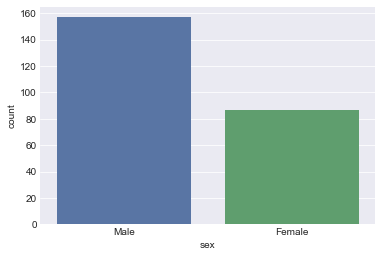

In [21]:
sns.set_style("darkgrid")
sns.countplot(x='sex',data=tips,palette='deep')

We can also get rid of the spines for countplot():

C:\Users\pgao\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


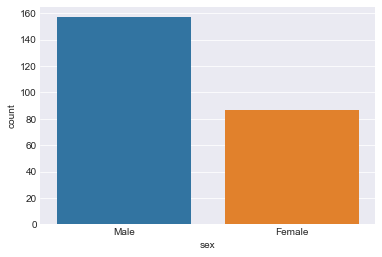

In [22]:
sns.countplot(x='sex',data=tips)
sns.despine()

Another command that is similar to set_style() is set_context(). There are other types of 'set' functions such as set_palette(). We we will not go over each item here but just keep in mind that these are usually used as a global statement for all visualizations. So more often than not these types of commands are likely to be specified at the beginning of your programs. As a simple example, typing sns.set_context('poster',font_scale=4) basically enlarges the font size and the 'poster' type makes the picture very large as a whole. 

Now moving on to the next topic, we will discuss box plots and violin plots. Conventionally, box plots and violin plots are used to show the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

A violin plot plays a similar role as a box plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

We start our discussion with box plots, and after showing the variations of the boxplot() function, we compare our results with those of violinplot().

C:\Users\pgao\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


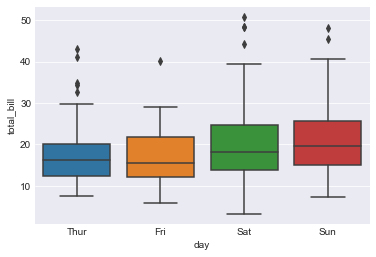

In [23]:
sns.boxplot(x="day", y="total_bill", data=tips)

The above is a standard box plot. Adding a few more words of codes can allow us to tweak our picture. For example, we can split up the box plot further by adding an optional argument 'hue' which does by-group analysis. We can also change the color of the box plots or the orientation of the box plots using respective optional arguments:

C:\Users\pgao\Anaconda3\lib\site-packages\seaborn\categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


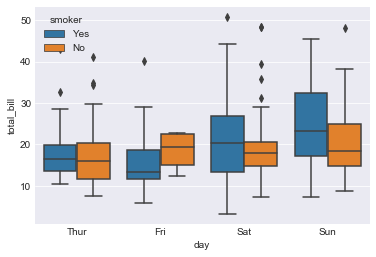

In [24]:
sns.boxplot(x="day", y="total_bill", data=tips, hue='smoker')

C:\Users\pgao\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


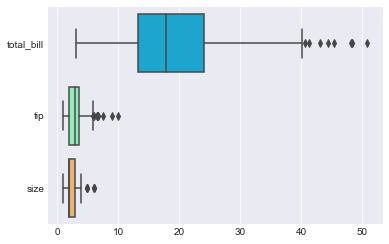

In [25]:
sns.boxplot(data=tips,palette='rainbow',orient='h')

In comparison, violinplot() is rarely used because the kernel density estimation could be confusing to many non-technical audiences. To change the nonparametric bandwidth, we can use the 'bw' argument. The default bandwidth is Scott's bandwidth, which is optimal for random samples of normally distributed data, in the sense that it minimizes the integrated mean squared error of the density estimate.

C:\Users\pgao\Anaconda3\lib\site-packages\seaborn\categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\pgao\Anaconda3\lib\site-packages\seaborn\categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


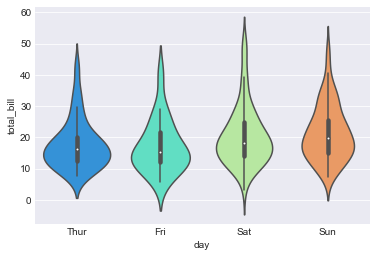

In [26]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

C:\Users\pgao\Anaconda3\lib\site-packages\seaborn\categorical.py:647: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
C:\Users\pgao\Anaconda3\lib\site-packages\seaborn\categorical.py:942: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])


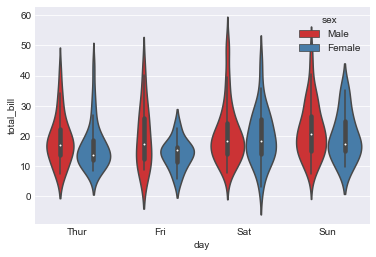

In [27]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1')

C:\Users\pgao\Anaconda3\lib\site-packages\seaborn\categorical.py:647: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
C:\Users\pgao\Anaconda3\lib\site-packages\seaborn\categorical.py:942: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])


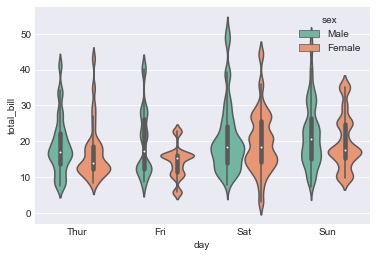

In [28]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set2', bw=0.2)

One can see from above that changing the bandwidth can drastically tweak the kernel density estimator (in this case, the data seem to be overfitted). We do not recommmend playing with this parameter too much if you are a beginner in data science. 

We can also use the 'split' argument to control whether to draw half of a violin for each level. This optional argument is only valid if you specify the 'hue' argument with only two levels:

C:\Users\pgao\Anaconda3\lib\site-packages\seaborn\categorical.py:647: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
C:\Users\pgao\Anaconda3\lib\site-packages\seaborn\categorical.py:895: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
C:\Users\pgao\Anaconda3\lib\site-packages\seaborn\categorical.py:915: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


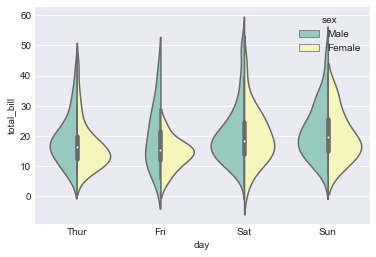

In [29]:
sns.violinplot(x="day", y="total_bill", data=tips, hue='sex', split=True, palette='Set3')

Now let's discuss stripplot(), which draws a scatterplot in which one variable is categorical. The stripplot() can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot() is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

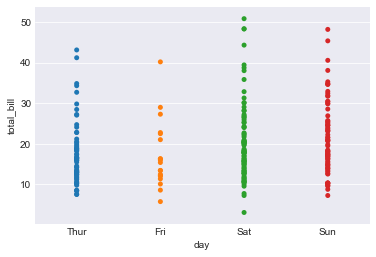

In [30]:
sns.stripplot(x="day", y="total_bill", data=tips)

As you see from the example above, the stripplot() basically gives us a scatter plot by group on a vertical line (by default). On examining this plot, you cannot easily tell how many points are actually stacked on top of each other. Therefore, stripplot() is often used with its enhancement invoked by setting the optional argument 'jitter' (which means to throw points everywhere). Jittering the points will show us the frequency of the points for each level, which is more visually friendly than the raw plot. 

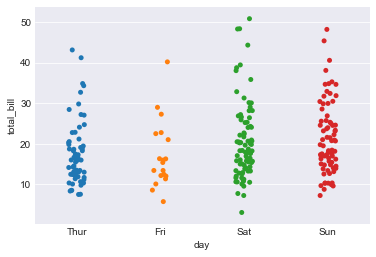

In [31]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True)

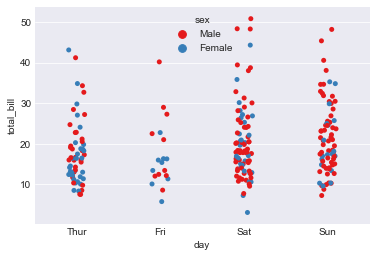

In [32]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True, hue='sex', palette='Set1')

We can think of swarmplot() as a combination of stripplot() and a violinplot() without the KDE curve:

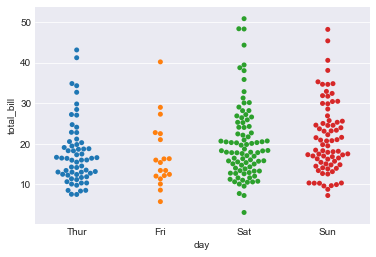

In [33]:
sns.swarmplot(x="day", y="total_bill", data=tips)

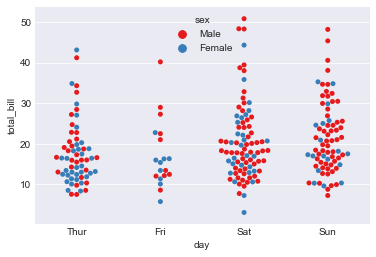

In [34]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1")

The visualization of swarmplot() can be tricky to non-statisticians so we don't recommend using swarmplot() widely. In addition, swarmplot() is really good for small datasets but not giant datasets. Another thing to keep in mind is that an additional argument 'dodge' essentially works the same way as the 'split' argument. In fact, the keyword for 'dodge' in older versions of swarmplot() is 'split'. If you type 'split', there won't be any error but you may get a warning message. 

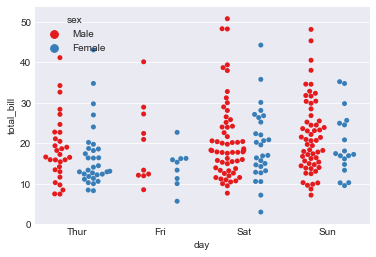

In [35]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", dodge=True)

We can combine plots easily as below. But again, this could be confusing to non-technical audiences and we do not recommend it generally. 

C:\Users\pgao\Anaconda3\lib\site-packages\seaborn\categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\pgao\Anaconda3\lib\site-packages\seaborn\categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


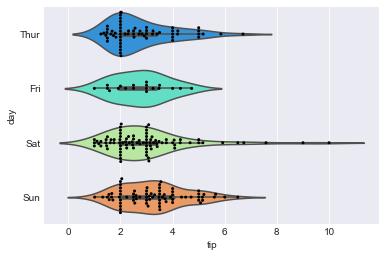

In [36]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

Lastly, let's introduce the most general form of categorical plot using the factorplot() function. This function can take a 'kind' parameter to adjust the plot types. This is like a mother-of-all types of plots which have a lot of flexibility. This can be used extensively but some users may prefer using idiosyncratic types of plots for their own use. This is often a matter of individual preferences:

C:\Users\pgao\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


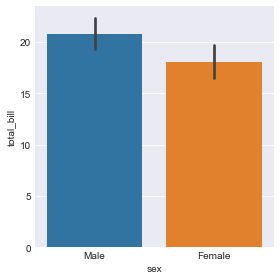

In [37]:
sns.factorplot(x='sex',y='total_bill',data=tips,kind='bar')

C:\Users\pgao\Anaconda3\lib\site-packages\seaborn\categorical.py:598: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
C:\Users\pgao\Anaconda3\lib\site-packages\seaborn\categorical.py:826: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


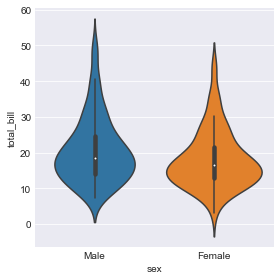

In [38]:
sns.factorplot(x='sex',y='total_bill',data=tips,kind='violin')